# MIT-BIHMV Dataset Creation
In this notebook, we create TS from the BIHMV data archive.

In [1]:
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [2]:
import numpy as np
import pandas as pd
import daproli as dp

import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_color_codes()

import Orange
import sys
import wfdb
import os
sys.path.append("../../")

from scipy import signal
from tqdm import tqdm
from src.visualizer import plot_ts

First, we need to download the PhysioNet record and annotation from https://physionet.org/content/vfdb/1.0.0/.

In [3]:
subject = 418

In [4]:
rec = wfdb.rdrecord(f"{subject}", pn_dir='vfdb') 

HTTPError: 404 Client Error: Not Found for url: https://physionet.org/files/vfdb/1.0.0/117.hea

In [5]:
ann = wfdb.rdann(f"{subject}", "atr", pn_dir='vfdb')

In [6]:
signal = 1
name = f"MIT-BIH-VE_{rec.sig_name[signal]}{signal}_Subject{subject}"
ts = rec.p_signal[:,signal]
cps = np.array(ann.sample)[np.array(ann.symbol) == "+"]

# ignore first CPs as it marks the beginning 
cps = cps[1:]

In [7]:
np.unique(ann.symbol)

array(['+'], dtype='<U1')

Let's visualise the TS.

<Figure size 432x288 with 0 Axes>

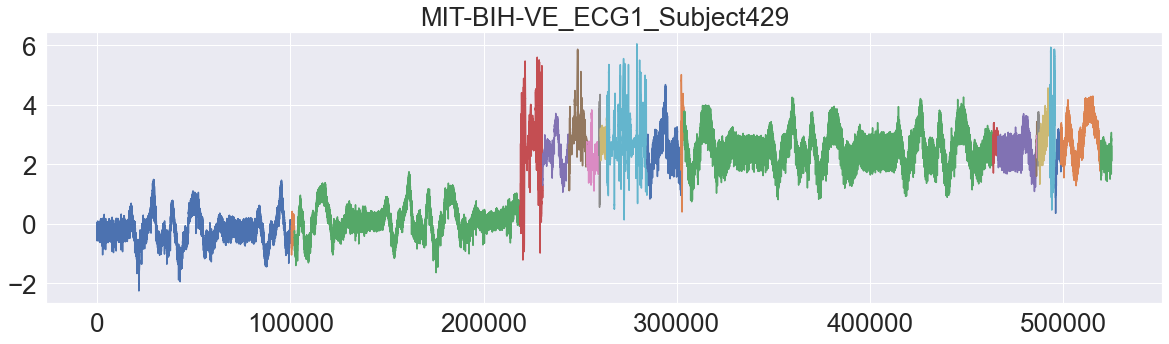

In [8]:
plot_ts(
    name,
    ts,
    cps,
    show=True
)

Finally, let's save the TS dataset.

In [9]:
DATASET_PATH = "../../datasets/MIT-BIH-VE/"

In [10]:
if not os.path.exists(DATASET_PATH):
    os.mkdir(DATASET_PATH)

In [11]:
records = pd.read_csv("https://physionet.org/files/vfdb/1.0.0/RECORDS", header=None)[0].to_numpy()

desc = []
data = dict()
signal = 1
window_size = 250

for subject in tqdm(records):
    rec = wfdb.rdrecord(f"{subject}", pn_dir='vfdb')
    ann = wfdb.rdann(f"{subject}", "atr", pn_dir='vfdb')
    
    for signal in range(len(rec.sig_name)):
        name = f"MIT-BIH-VE_{rec.sig_name[signal]}_Subject{subject}"
        ts = rec.p_signal[:,signal]
        cps = np.array(ann.sample)[np.array(ann.symbol) == "+"]

        # ignore first CPs as it marks the beginning 
        cps = cps[1:]

        desc.append(f"{name},{window_size},{','.join(dp.map(str, cps))}")
        data[name] = ts
            
np.savetxt(f"{DATASET_PATH}desc.txt", desc, fmt="%s")
np.savez(f"{DATASET_PATH}data.npz", **data)

100%|███████████████████████████████████████████| 22/22 [01:41<00:00,  4.59s/it]
